Classification Report:
              precision    recall  f1-score   support

    নোয়াখালি       0.89      0.89      0.89       114
      প্রমিত       0.89      0.93      0.91       100
      বরিশাল       0.89      0.97      0.93       107
   ময়মনসিংহ       0.89      0.77      0.83        87
       সিলেট       0.91      0.89      0.90        92

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Accuracy: 89.40%


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2507 (\N{BENGALI VOWEL SIGN O}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2527 (\N{BENGALI LETTER YYA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: 

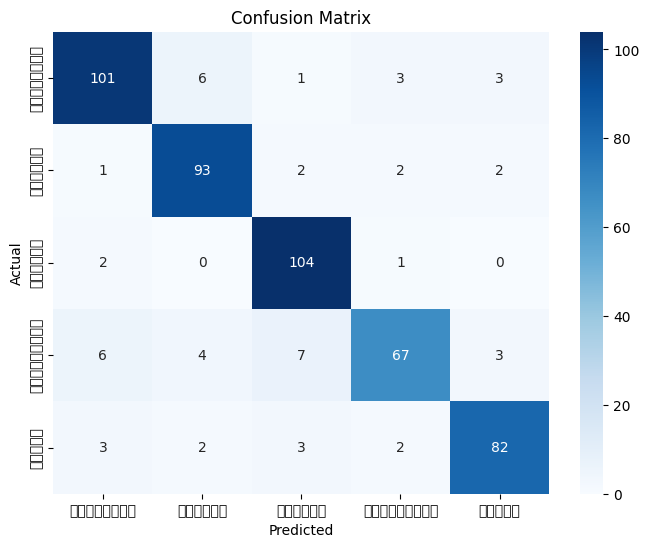

Comparison of Actual vs Predicted:
         Actual  Predicted
2319      সিলেট      সিলেট
1865   নোয়াখালি   নোয়াখালি
902   ময়মনসিংহ  ময়মনসিংহ
2240      সিলেট      সিলেট
1285     বরিশাল     বরিশাল
...         ...        ...
2054      সিলেট      সিলেট
1860   নোয়াখালি   নোয়াখালি
1862   নোয়াখালি      সিলেট
1151     বরিশাল     বরিশাল
461      প্রমিত     প্রমিত

[500 rows x 2 columns]

Test Predictions:
Text: মোরা -> Predicted Language: বরিশাল
Text: বুইন -> Predicted Language: বরিশাল
Text: ফারবে -> Predicted Language: সিলেট
Text: কইতাসিলেন -> Predicted Language: ময়মনসিংহ


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif'] = 'Tiro Bangla'
#plt.rcParams['font.family'] = 'sans-serif'


# Load the dataset
data = pd.read_csv("/content/Bangla_territorial_extended.csv")
df = pd.DataFrame(data)

# Preprocessing - Tokenizing into words/characters
X = df["text"]  # Text
y = df["label"]  # Label
# Handle missing values in 'text' column
X = X.fillna("")  # Replace NaN with empty string

# Feature Extraction using CountVectorizer
vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, 3))
X_features = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare actual and predicted texts
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("Comparison of Actual vs Predicted:")
print(comparison_df)

# Save the trained model and vectorizer files
with open("language_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Test with new data
test_texts = ["মোরা", "বুইন", "ফারবে", "কইতাসিলেন"]
test_features = vectorizer.transform(test_texts)
predictions = model.predict(test_features)

print("\nTest Predictions:")
for text, pred in zip(test_texts, predictions):
    print(f"Text: {text} -> Predicted Language: {pred}")
